Dane satelitarne stanowią nieodłączny element naszego życia. Analizują one wiele aspektów, takie jak pogoda, zmiany klimatyczne, rozwój urbanistyki czy rolnictwa. Służą one przede wszystkim porównywaniu różnych stanów z różnych zakresów czasu. Do tego projektu wybrałam analizę danych sateltarnych - zdjęć z każdego miesiąca roku 2024, robionych nad obszarem Parku Narodowego "Ujście Warty" oraz miasta Kostrzyn nad Odrą.

Wybór metody analizy był dość nieoczywisty - jest to metoda prosta, ale spełniająca swoje podstawowe funkcje. Jest program w języku Python, napisany w pełni przez sztuczną inteligencję (AI). Jak powszechnie wiadomo, AI staje się powoli fundamentem analizy wszelkich danych - w tym też tych satelitarnych. Dlatego też postanowiłam sprawdzić, czy nada się ona też do napisania prostego programu do pomocy przy takiej analizie "gołym okiem", dzięki czemu będzie to bardzo przystępne dla osób nie specjalizujących się w tej dziedzinie.

Program pozwala na pobranie zdjęć z folderu na komputerze użytkownika (ważne - zdjęcia muszą być podpisane w formacie RRRR-MM-DD GGMMSS), wpisanie modelu satelity oraz orbity, na jakiej się on znajduje, a następnie na wybranie czterech zdjęć z tego folderu, z których następnie jest tworzony kolaż - przedstawiający dany obszar z czterech perspektyw wybranych zdjęć z różnych okresów czasu, co pozwala na natychmiastowe porównanie danego obszaru i zauważenie zmian, które mogły się wydarzyć na przestrzeni kilku miesięcy.

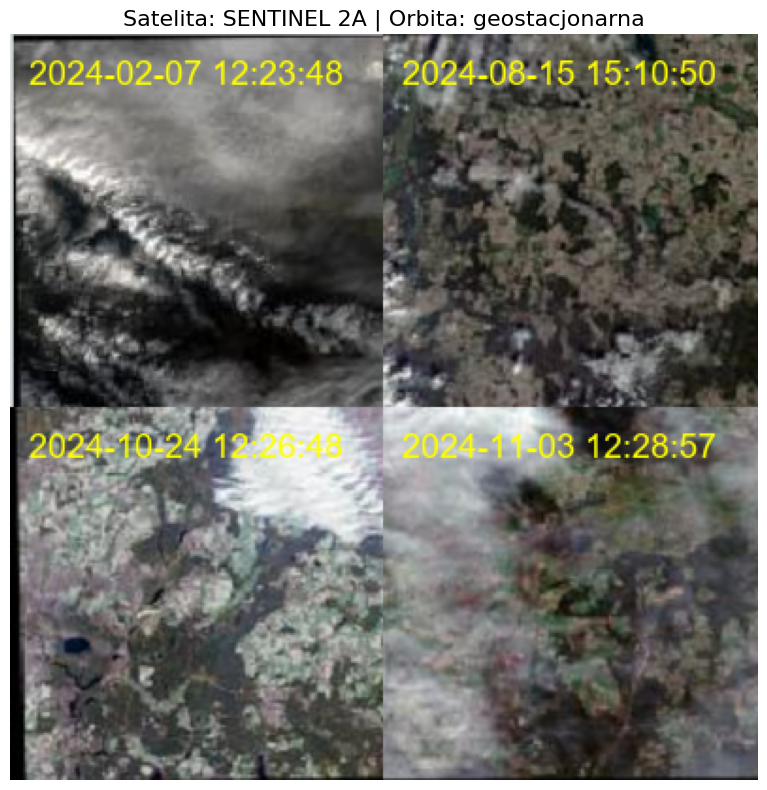

In [ ]:
import os
import tkinter as tk
from tkinter import filedialog, messagebox, simpledialog
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

SUPPORTED_FORMATS = ('.jpg', '.jpeg', '.png', '.tif', '.tiff')

def extract_datetime(filename):
    import re
    match = re.search(r'(\d{4}-\d{2}-\d{2})[ _](\d{6})', filename)
    if match:
        date_part = match.group(1)
        time_raw = match.group(2)
        time_part = f"{time_raw[:2]}:{time_raw[2:4]}:{time_raw[4:]}"
        return f"{date_part} {time_part}"
    return "Brak daty"

def load_images_from_folder(folder):
    images = []
    for fname in os.listdir(folder):
        if fname.lower().endswith(SUPPORTED_FORMATS):
            full_path = os.path.join(folder, fname)
            dt = extract_datetime(fname)
            images.append((full_path, fname, dt))
    return images

def show_collage(selected_images, sat_model, orbit):
    if len(selected_images) != 4:
        messagebox.showerror("Błąd", "Wybierz dokładnie 4 zdjęcia.")
        return

    images = [Image.open(path).convert("RGB") for path, _, _ in selected_images]
    base_size = images[0].size
    images = [img.resize(base_size) for img in images]

    w, h = base_size
    half_w, half_h = w // 2, h // 2

    crops = [
        images[0].crop((0, 0, half_w, half_h)),          
        images[1].crop((half_w, 0, w, half_h)),          
        images[2].crop((0, half_h, half_w, h)),          
        images[3].crop((half_w, half_h, w, h))           
    ]


    collage = Image.new("RGB", base_size)

    
    collage.paste(crops[0], (0, 0))                   
    collage.paste(crops[1], (half_w, 0))              
    collage.paste(crops[2], (0, half_h))              
    collage.paste(crops[3], (half_w, half_h))         

    
    draw = ImageDraw.Draw(collage)
    try:
        font = ImageFont.truetype("arial.ttf", 18)
    except:
        font = ImageFont.load_default()

    positions = [
        (10, 10),                                 
        (half_w + 10, 10),                        
        (10, half_h + 10),                        
        (half_w + 10, half_h + 10)                
    ]

    for pos, (_, _, dt) in zip(positions, selected_images):
        draw.text(pos, dt, font=font, fill=(255, 255, 0))

    
    plt.figure(figsize=(10, 8))
    plt.imshow(collage)
    plt.title(f"Satelita: {sat_model} | Orbita: {orbit}", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


def main():
    root = tk.Tk()
    root.withdraw()

    
    folder = filedialog.askdirectory(title="Wybierz folder ze zdjęciami")
    if not folder:
        return

    all_images = load_images_from_folder(folder)
    if len(all_images) < 4:
        messagebox.showerror("Za mało zdjęć", "Folder musi zawierać co najmniej 4 zdjęcia.")
        return

    
    sat_model = simpledialog.askstring("Model satelity", "Podaj model satelity:")
    orbit = simpledialog.askstring("Typ orbity", "Podaj typ orbity (np. polarna, geostacjonarna):")

    
    selector = tk.Tk()
    selector.title("Wybierz 4 zdjęcia do porównania")

    listbox = tk.Listbox(selector, selectmode=tk.MULTIPLE, width=80, height=20)
    for i, (_, fname, dt) in enumerate(all_images):
        listbox.insert(i, f"{fname} | Data i godzina: {dt}")
    listbox.pack()

    def on_confirm():
        selected_indices = listbox.curselection()
        if len(selected_indices) != 4:
            messagebox.showwarning("Uwaga", "Musisz wybrać dokładnie 4 zdjęcia.")
            return
        selected = [all_images[i] for i in selected_indices]
        selector.destroy()
        show_collage(selected, sat_model, orbit)

    btn = tk.Button(selector, text="Utwórz kolaż", command=on_confirm)
    btn.pack(pady=10)

    selector.mainloop()

if __name__ == "__main__":
    main()

Jest to program prosty i przystępny dla każdego.